## Installing needed libraries
P.S : the following packages were already installed in the first run for this file, you do not need to rerun those cells.

In [ ]:
! pip install nest-asyncio  # must be downloaded for twint library to work properly

In [ ]:
!pip install demoji

In [ ]:
! pip install emoji-encoding

In [ ]:
! pip install emoji

In [ ]:
!pip install pyspellchecker

In [ ]:
!pip uninstall twint
!pip3 install --user --upgrade "git+https://github.com/twintproject/twint.git@origin/master#egg=twint"

Found existing installation: twint 2.1.21
Uninstalling twint-2.1.21:
  Would remove:
    /root/.local/bin/twint
    /root/.local/lib/python3.7/site-packages/twint-2.1.21.dist-info/*
    /root/.local/lib/python3.7/site-packages/twint/*
Proceed (y/n)? y
  Successfully uninstalled twint-2.1.21
  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to /tmp/pip-install-m013w8vs/twint_66a77c29270c4124b039e1393a697d09
  Running command git clone -q https://github.com/twintproject/twint.git /tmp/pip-install-m013w8vs/twint_66a77c29270c4124b039e1393a697d09
  Running command git checkout -q origin/master
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38871 sha256=e776ed87ef13cd3c0b1c4ed7380a33f2a89f539dcf43a1dc6d96ec2cd1265e58
  Stored in directory: /tmp/pip-ephem-wheel-cache-6qsn6gok/wheels/8d/dc/9f/74b4483d5f997036f04aec7f42bd4b3c80f04264920c368068
Successfully built twint
  Consider adding this directory to PATH or, if you prefer to suppress thi

In [ ]:
! pip install nltk

## Mounting to google drive is mandatory in order to read and save data there


In [ ]:
# Mounting to google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Importing needed libraries

In [ ]:
import nest_asyncio  # must be imported and applied for twint library to work properly
nest_asyncio.apply()

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import sys
import os

import nltk
from nltk.corpus import stopwords, words
import spacy
from spacy.lang.en import STOP_WORDS
import emoji
import demoji
from spellchecker import SpellChecker

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import nltk
#nltk.download('stopwords')
#nltk.downl oad('words')

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical


In [ ]:
# !pip uninstall twint
# !pip3 install --user --upgrade "git+https://github.com/twintproject/twint.git@origin/master#egg=twint"

In [ ]:
import twint # if you got any errors running this cell please restart the runtime and uncomment the previous cell and run it (it is a bug with the library itself)

## Scraping Data (step 1- week 1)
P.S: In this part you can either change the following variables 

```
date='2019-09-20'
wordToSearch= '#iPhone13'
numOfTweets= 100
```
and go through the code step by step to scrap the twitter for you selected inforamtion, or you can skip this part and go straight to the part named (read collected data) in order to load the already scrapped data and continue from there.


In [ ]:
default_date='2019-09-20'
default_search_string='#iPhone13'

In [ ]:
date='2019-09-20'  #if you decide to change the date, please follow the same formatting as the default value
search_string= '#iPhone13' 
numOfTweets= 100  
# you can choose the number of tweets to be scrapped, 
# but it is recommended to avoid choosing a large number in the sake of saving time scrapping and cleaning the data

In [ ]:
# Defining a function to scrap 'search_string' mentioned in tweets since a specific date 'since' within the limit 'limit' of tweets.
def twint_search(since, search_string,limit):
    c = twint.Config()
    c.Limit = limit
    c.Search = search_string
    c.Since = since
    c.Lang = 'en'       # scrapping tweets in english (there is a bug in the library itself, that is why the scrapped tweets are not only in english)
    c.Store_csv = True  #Stroing the tweets in a csv file
    c.Output = "/content/drive/MyDrive/scrapped_data/"+search_string+"_"+date+".csv"
    twint.run.Search(c) #searching in twitter
    df = pd.read_csv("/content/drive/MyDrive/scrapped_data/"+search_string+"_"+date+".csv")
    return df  #returning the results as dataframe

In [ ]:
# calling the scraping function
df=twint_search(date,search_string,numOfTweets)

1510721179820040192 2022-04-03 20:49:31 +0000 <cad2095> 今日、機種変で注文したiPhone13(グリーン)が届くので4時に目が覚めたw iPhone8 Plusを約4年半使いました。バッテリー状態は84%ですが減り方ヤバかったのでiPhone13に換えました。ヤバメッチャ楽しみ😁#iPhone13 #新色グリーン
1510719048266678272 2022-04-03 20:41:03 +0000 <ikkatu12> ノジマ iPhone13 iPhone13mini MNP 一括 1円 キャッシュバック付のからくり 下取りがないと契約出来ないみたい 回線なし契約させないそのからくり #iPhone13  #MNP   https://t.co/pnhKNSpnWr
1510718866967908355 2022-04-03 20:40:20 +0000 <ausshimata> ＼iPhone最新モデル 好評発売中！／ ご購入には事前のご予約が必要です。 当店のWEB予約サイトをご利用ください↓  https://t.co/YNViBCE7qp 店頭には実機も展示中！最新機能を体感できます！ お気軽にご来店ください。 #au #iphone #iphone13 #光市
1510715330229772292 2022-04-03 20:26:17 +0000 <piloka> 今日も札幌東部の#イマソラ は良いお天気です！ 今日は歯医者だぁ〜💦  #イマソラ  #札幌東部  #iphone13  https://t.co/nL6oKutFoD
1510713578466295808 2022-04-03 20:19:19 +0000 <keitaijohokyoku> ドコモのiPhone12 MNP一括1円ってやばく無い？ #MNP  #iPhone12 #一括1円 #iPhone13  https://t.co/PqSHNXlltB
1510707836715683842 2022-04-03 19:56:30 +0000 <jaimepuerta> One day, one photo Day 136 // 2022/04/01  #onedayonephoto  @apple #iphone

In [ ]:
# checking the dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               206 non-null    int64  
 1   conversation_id  206 non-null    int64  
 2   created_at       206 non-null    object 
 3   date             206 non-null    object 
 4   time             206 non-null    object 
 5   timezone         206 non-null    int64  
 6   user_id          206 non-null    int64  
 7   username         206 non-null    object 
 8   name             206 non-null    object 
 9   place            1 non-null      object 
 10  tweet            206 non-null    object 
 11  language         206 non-null    object 
 12  mentions         206 non-null    object 
 13  urls             206 non-null    object 
 14  photos           206 non-null    object 
 15  replies_count    206 non-null    int64  
 16  retweets_count   206 non-null    int64  
 17  likes_count     

In [ ]:
# printing a tweet as an example
df['tweet'][17]

'楽天モバイルの『W突破記念キャンペーン』MNPとiPhone購入で35,000ポイント‼   https://t.co/CDSgUIraRk  #楽天モバイル #iPhone13 #ブログ #ブログ更新'

In [ ]:
collected_data=df # renaming

## Read collected data

In [ ]:
collected_data = pd.read_csv("/content/drive/MyDrive/scrapped_data/"+default_search_string+"_"+default_date+".csv") # reading the dataset after scraping and saving it 

## Cleaning Data (step 2 - week 2)
In this step you can either go through the code step by step (run each cell) and clean the data you have scrapped or read, or you can skip the cleaning part and go straight to the part with the name (read cleaned data) which will read a file with cleaned data ( a data we have already scrapped from twitter and cleaned it through the following cleaning pipeline)

In [ ]:
nlp = spacy.load('en_core_web_sm')  # English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.
#stop_words = set(stopwords.words('english')) #Uploading Stopwords
#words = set(nltk.corpus.words.words()) # set of english words
spell = SpellChecker() 
table = str.maketrans('', '', string.punctuation) # table to delete the punctuation from the texts by using string library

In [ ]:
tweets=collected_data["tweet"].values.tolist() # tweets list contains the scraped tweets

In [ ]:
def cleaning(text): 
    # Replacing emojis with their describtion
    # print(text)
    #no_emoji=demoji.replace_with_desc(text," ") 
    no_at = re.sub("@[A-Za-z0-9]+","",text) #Remove @ sign
    no_link = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", no_at) #Remove http links
    no_hashtag = no_link.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    no_asci=re.sub(r'[^\x00-\x7f]',r' ',no_hashtag) #non asci
    no_punc=no_asci.translate(table) #delete punctuals
    #tweet = " ".join(w for w in nltk.wordpunct_tokenize(no_punc) #  splitting the tweet into tokens
    #     if w.lower() in words and w.isalpha())
    return no_punc

In [ ]:
def spell_checking(text):
    # Fixing Word Lengthening, which occurs when characters are wrongly repeated. 
    # English words have a max of two repeated characters. Additional characters need to ripped off, 
    pattern = re.compile(r"(.)\1{2,}")
    length_fixed= pattern.sub(r"\1\1", text)
    tweet = " ".join(w if (w[0].isupper()) else spell.correction(w) for w in nltk.wordpunct_tokenize(length_fixed) )
    return(tweet)

In [ ]:
def nlp_analyzing(text):    
    doc = nlp(text)
    lemmas = []
    for token in doc:
        if token.lang_ == 'en' and token.pos_ != 'SPACE' : #and token.text not in STOP_WORDS:
            if token.ent_type_!="":  # if the token is recognized as a Name Entity
                lemmas.append(token.text)
            else: # token.text.lower() in words: #Checking if the word is in the dictionary (meaningful english world)
                lemmas.append(token.lemma_)
    return ' '.join(lemmas)

In [ ]:
def clean(data): # Data Cleaning pipeline
    cleaned_data=[nlp_analyzing(cleaning(x)) for x in data]
    return cleaned_data
    #return data.apply(lambda x : nlp_analyzing(spell_checking(cleaning(x))))

In [ ]:
tweets[0] # printing a tweet before cleaning it

'#iPhone13 の機種変更時に下取りしてもらえなかったiPhone買い取り致します。壊れていても高額買取致します。'

In [ ]:
tweets[17] # printing a tweet before cleaning it

'楽天モバイルの『W突破記念キャンペーン』MNPとiPhone購入で35,000ポイント‼   https://t.co/CDSgUIraRk  #楽天モバイル #iPhone13 #ブログ #ブログ更新'

In [ ]:
nlp_analyzing(spell_checking(cleaning(tweets[0]))) # cleaning the same tweet and printing it

'iphone iPhone'

In [ ]:
cleaned=clean(tweets) # cleaning the tweets

In [ ]:
len(cleaned) #checking the number of tweets

206

## Read cleaned data
you can skip this part if you would like to complete with the data you have scrapped

In [ ]:
file_name="/content/drive/MyDrive/cleaned_data/"+default_search_string+"_"+default_date+".txt"

In [ ]:
data = pd.read_csv(file_name, sep="\n", header=None)
#data.columns = ["a", "b", "c", "etc."]

In [ ]:
cleaned=data.values.tolist()

## Printing word cloud after cleaning the data

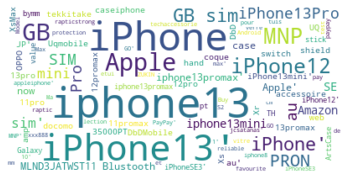

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# plotting a word cloud of positive mentions of iPhone13 in the tweets
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(cleaned))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## saving cleaned data
you can skip this part if you have not scrapped new data, or if youhave scrapped new data and you do not wish to save it

In [ ]:
# writing the results to a file 
with open("/content/drive/MyDrive/cleaned_data/"+search_string+"_"+date+".txt", 'w') as f:
    for item in cleaned:
        f.write("%s\n" % item)

## Creating RNN model for sentiment analysis. (step 3&4 - week 3&4)

### Reading data to be used as training and testing data, there is no need to run the following cells in this part, since the model is already trained and we will load it and use it for prediction

creating a class to build a RNN (LSTM) model to predict sentamic 

In [ ]:
# training dataset can be found at: https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset
df = pd.read_csv('/content/drive/MyDrive/Data_for_training/Twitter_Data.csv')

In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.shape # checking the shape of the dataset

(162980, 2)

In [ ]:
df=df.dropna() #dropping all none rows

In [ ]:
df.shape   # checking the shape of the dataset after checking the shape of the dataset

(162969, 2)

In [ ]:
df['clean_text']=clean(df['clean_text']) #cleaning the data (it is expected to consume time)

In [ ]:
df.head() #printing five rows of the cleaned data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df_no_neutral = df[df.category != 0] # the data has 3 sentiment values [-1,0,1] we are droppping the rows with neutral sentiment for better training the model

In [ ]:
df_no_neutral.shape   #cheking the number of rows in the data

(107758, 2)

In [ ]:
df_no_neutral.to_csv('/content/drive/MyDrive/Data_for_training/Cleaned_Twitter_Data.csv')  #saving the cleaned data

### Defining and training the model
the following cells should not be runned (please do not try to train the model again unless you have time to wait for it to finish, by time I mean at least aan hour at least), the training consumes alot of time and the model is already trained. Please skip to the part named (load trained model) to load the model. 

In [ ]:
vocabSize=1500
tokenizer = Tokenizer(num_words=1500, split=' ')
tokenizer.fit_on_texts(df_no_neutral['clean_text'].values)
X = tokenizer.texts_to_sequences(df_no_neutral['clean_text'])
X = pad_sequences(X)

In [ ]:
embed_dim = 128
vocabSize=1500
lstm_out = 196

model = Sequential()
model.add(Embedding(vocabSize, embed_dim,input_length = 34))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.add(Flatten())
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [ ]:
model.summary()

In [ ]:
df['category'].shape

In [ ]:
# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X,df_no_neutral['category'], test_size = 0.15, random_state = 42)


In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:

# training
model.fit(X_train, y_train,validation_data = (X_test,y_test),epochs = 10, batch_size=32)

In [ ]:
# saving the trained model
model.save("/content/drive/MyDrive/trained_1")

In [ ]:
# evaluating the trained model
model.evaluate(X_test,y_test)

In [ ]:
# predicting
print("Prediction: ", model.predict(X_test[5:10]))
print("Actual: \n",y_test[5:10])

## load trained model

In [ ]:
for_predicting=cleaned[5:10] # five tweets to analyze sentiments, for example only

In [ ]:
vocabSize=1500
tokenizer = Tokenizer(num_words=1500, split=' ')
tokenizer.fit_on_texts(for_predicting)
X = tokenizer.texts_to_sequences(for_predicting)
X = pad_sequences(X,maxlen=34)
embed_dim = 128
vocabSize=1500
lstm_out = 196

model = Sequential()
model.add(Embedding(vocabSize, embed_dim,input_length = 34))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.add(Flatten())
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])



In [ ]:
from keras.models import load_model 
model=load_model("/content/drive/MyDrive/trained_1")

In [ ]:
# predicting
print("Prediction: ", model.predict(X)) # printing probabilites of each class [-1,1]

Prediction:  [[0.49999613 0.5000039 ]
 [0.49999073 0.50000924]
 [0.49999115 0.5000088 ]
 [0.49999386 0.5000062 ]
 [0.49998558 0.5000144 ]]


In [ ]:
y_predict = np.argmax(model.predict(X), axis=-1)

In [ ]:
y_predict #predicting the class of each tweet

array([1, 1, 1, 1, 1])